In [121]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, PandasTools

In [122]:
smiles = [
    "CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C",
    "CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C",
    "CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O"
]
names = ["cyclosporine", "clozapine", "beta-carotene", "cannabidiol"]

In [123]:
molecules = pd.DataFrame({'names': names, 'smiles': smiles})

In [124]:
molecules

,names,smiles
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O


,names,smiles,ROMol
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,

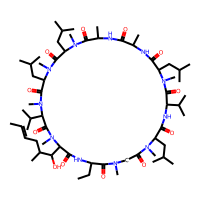
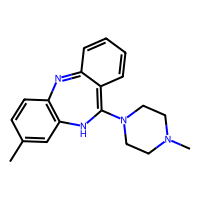
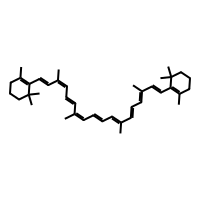
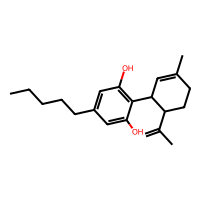

In [125]:
PandasTools.AddMoleculeColumnToFrame(molecules, 'smiles')
molecules

In [126]:
molecules['molecular_weight'] = molecules['ROMol'].apply(Descriptors.ExactMolWt)

In [127]:
molecules['n_hbd'] = molecules['ROMol'].apply(Descriptors.NumHDonors)

In [128]:
molecules['n_hba'] = molecules['ROMol'].apply(Descriptors.NumHAcceptors)

In [129]:
molecules['logp'] = molecules['ROMol'].apply(Descriptors.MolLogP)

In [130]:
molecules['color'] = ["red", "green", "blue", "cyan"]

In [131]:
molecules[['molecular_weight', 'n_hba', 'n_hbd', 'logp']]

,molecular_weight,n_hba,n_hbd,logp
0,1201.841368,12,5,3.26900
1,306.184447,4,1,1.68492
2,536.438202,0,0,12.60580
3,314.224580,2,2,5.84650


In [132]:
import matplotlib.pyplot as plt

In [133]:
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}


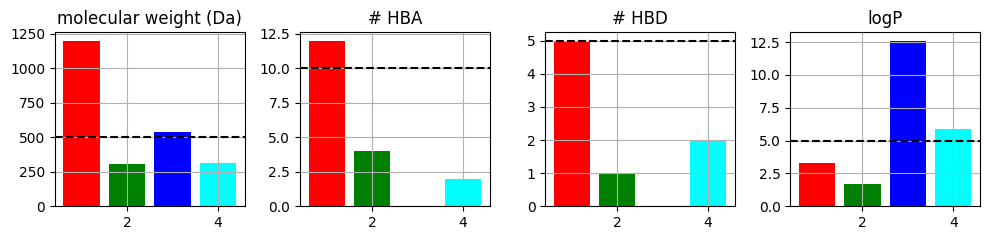

In [134]:
plt.subplots(1, 4, figsize=(10, 2.5))
for br, (key, (threshold, name)) in enumerate(ro5_properties.items(), start=1):
    plt.subplot(1, 4, br)
    plt.bar(x=[1, 2, 3, 4], height=molecules[key], color=molecules['color'])
    plt.title(label=name, loc='center')
    plt.axhline(threshold, linestyle='--', color='k')
    plt.tight_layout()
    plt.grid()
    

In [135]:
molecules['num_passed'] = (molecules['molecular_weight'] <= 500) & (molecules['n_hba'] <= 10) & (molecules['n_hbd'] <= 5) & (molecules['logp'] <= 5)

In [136]:
molecules['num_passed']

0    False
1     True
2    False
3    False
Name: num_passed, dtype: bool

In [137]:
sum((molecules['molecular_weight'] <= 500) + (molecules['n_hba'] <= 10) + (molecules['n_hbd'] <= 5) + (molecules['logp'] <= 5))

4

In [138]:
def num_passed(row):
    return sum([(row['molecular_weight'] <= 500), (row['n_hba'] <= 10), (row['n_hbd'] <= 5), (row['logp'] <= 5)]) >= 3

In [139]:
res = []
for br, row in molecules.iterrows():
    res.append(num_passed(row))
molecules['num_passed'] = res


,names,smiles,ROMol,molecular_weight,n_hbd,n_hba,logp,color,num_passed
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,,1201.841368,5,12,3.26900,red,False
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,,306.184447,1,4,1.68492,green,True
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,,536.438202,0,0,12.60580,blue,False
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,,314.224580,2,2,5.84650,cyan,True

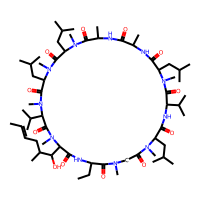
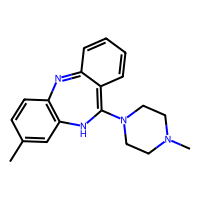
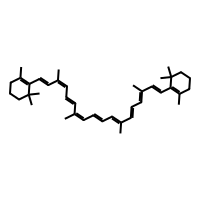
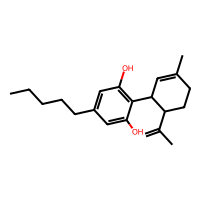

In [140]:
molecules

In [141]:
molecules['num_passed']

0    False
1     True
2    False
3     True
Name: num_passed, dtype: bool

In [142]:
df = pd.read_csv('data/EGFR_compounds_2.csv', index_col=0)

In [143]:
df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879


In [144]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')

In [145]:
df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,ROMol
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216,<rdkit.Chem.rdchem.Mol object at 0x000001AD75C...
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,<rdkit.Chem.rdchem.Mol object at 0x000001AD82C...
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517,<rdkit.Chem.rdchem.Mol object at 0x000001AD805...
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030,<rdkit.Chem.rdchem.Mol object at 0x000001AD805...
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879,<rdkit.Chem.rdchem.Mol object at 0x000001AD805...


In [146]:
df['molecular_weight'] = df['ROMol'].apply(Descriptors.ExactMolWt)

In [147]:
df['n_hbd'] = df['ROMol'].apply(Descriptors.NumHDonors)

In [148]:
df['n_hba'] = df['ROMol'].apply(Descriptors.NumHAcceptors)

In [149]:
df['logp'] = df['ROMol'].apply(Descriptors.MolLogP)

In [150]:
df.head(2)

,molecule_chembl_id,IC50,units,smiles,pIC50,ROMol,molecular_weight,n_hbd,n_hba,logp
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216,<rdkit.Chem.rdchem.Mol object at 0x000001AD75C...,383.094916,3,4,4.45034
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,<rdkit.Chem.rdchem.Mol object at 0x000001AD82C...,482.126944,3,6,3.61432


In [151]:
res = []
for br, row in df.iterrows():
    res.append(num_passed(row))
df['num_passed'] = res

In [152]:
df['num_passed']

0        True
1        True
2        True
3        True
4        True
        ...  
7483    False
7484    False
7485    False
7486    False
7487     True
Name: num_passed, Length: 7488, dtype: bool

In [153]:
df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,ROMol,molecular_weight,n_hbd,n_hba,logp,num_passed
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216,<rdkit.Chem.rdchem.Mol object at 0x000001AD75C...,383.094916,3,4,4.45034,True
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,<rdkit.Chem.rdchem.Mol object at 0x000001AD82C...,482.126944,3,6,3.61432,True
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517,<rdkit.Chem.rdchem.Mol object at 0x000001AD805...,369.170194,1,6,4.77200,True
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030,<rdkit.Chem.rdchem.Mol object at 0x000001AD805...,283.095691,2,4,2.31056,True
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879,<rdkit.Chem.rdchem.Mol object at 0x000001AD805...,164.047344,2,2,1.49000,True


In [154]:
df.drop(columns='ROMol', inplace=True)

In [155]:
df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hbd,n_hba,logp,num_passed
0,CHEMBL68920,41.0,nM,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216,383.094916,3,4,4.45034,True
1,CHEMBL69960,170.0,nM,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,482.126944,3,6,3.61432,True
2,CHEMBL137635,9300.0,nM,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,5.031517,369.170194,1,6,4.77200,True
3,CHEMBL306988,500000.0,nM,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,3.301030,283.095691,2,4,2.31056,True
4,CHEMBL66879,3000000.0,nM,O=C(O)/C=C/c1ccc(O)cc1,2.522879,164.047344,2,2,1.49000,True


In [156]:
cols = ["molecular_weight", "n_hba", "n_hbd", "logp"]

In [157]:
df[cols][df['num_passed']].describe().T[['mean', 'std']]

,mean,std
molecular_weight,423.525102,87.962437
n_hba,6.188798,1.892821
n_hbd,1.903984,1.025293
logp,4.087446,1.162850


In [158]:
df[cols][~df['num_passed']].describe().T[['mean', 'std']]

,mean,std
molecular_weight,587.790021,94.325191
n_hba,8.209418,2.158220
n_hbd,2.122057,1.480385
logp,5.886448,1.292777


In [159]:
df = df[df['num_passed']]
df.rename(columns={'num_passed': 'passed'}, inplace=True)
df.to_csv('data/EGFR_compounds_lipinski_1.csv')

In [160]:
df.shape

(5874, 10)